## Load Data

In [81]:
data_path = '../data/digits.csv'

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(data_path)

Show the first 10 rows of the data

In [73]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get Descriptive Statistics of Data

In [74]:
from pandas_summary import DataFrameSummary

In [6]:
DataFrameSummary(data).summary()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
mean,4.45664,0,0,0,0,0,0,0,0,0,...,0.219286,0.117095,0.0590238,0.0201905,0.0172381,0.00285714,0,0,0,0
std,2.88773,0,0,0,0,0,0,0,0,0,...,6.31289,4.63382,3.27449,1.75987,1.8945,0.414264,0,0,0,0
min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
max,9,0,0,0,0,0,0,0,0,0,...,254,254,253,253,254,62,0,0,0,0
counts,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
uniques,10,1,1,1,1,1,1,1,1,1,...,57,36,19,10,6,3,1,1,1,1


## Identify Inputs and Output

In [14]:
[data.columns[0]]

['label']

In [15]:
output_var = [data.columns[0]]
input_vars = list(data.columns[1:])

In [16]:
data_X = data[input_vars]
data_y = data[output_var]

## Stratified Split to Train, Validation and Test Parts

In [17]:
from sklearn.model_selection import train_test_split

In [75]:
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=None, stratify = data_y, shuffle = True)

In [76]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=None, stratify = train_y, shuffle = True)

In [77]:
train_y = np.squeeze(np.array(train_y))
val_y = np.squeeze(np.array(val_y))
test_y = np.squeeze(np.array(test_y))
y_true = test_y

In [78]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)
print(test_X.shape)
print(test_y.shape)

(26880, 784)
(26880,)
(6720, 784)
(6720,)
(8400, 784)
(8400,)


(array([2997., 2674., 2785., 2605., 2429., 2648., 2817., 2600., 2680.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

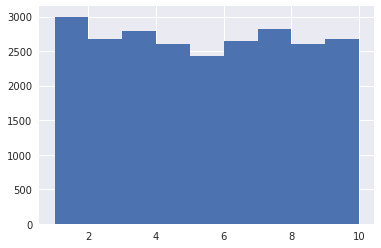

In [80]:
plt.hist(train_y, bins = [1,2,3,4,5,6,7,8,9,10])

## Build Simple Neural Network

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [56]:
batch_size = 128
num_classes = 10
epochs = 200

In [57]:
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [58]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr = 0.0001),
metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(train_X, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(val_X, val_y))

Train on 26880 samples, validate on 6720 samples
Epoch 1/200
26880/26880 [==============================] - 1s 46us/step - loss: 8.1379 - acc: 0.4727 - val_loss: 3.6282 - val_acc: 0.7597
Epoch 2/200
26880/26880 [==============================] - 1s 31us/step - loss: 3.5469 - acc: 0.7628 - val_loss: 1.6255 - val_acc: 0.8875
Epoch 3/200
26880/26880 [==============================] - 1s 35us/step - loss: 2.2925 - acc: 0.8437 - val_loss: 1.4304 - val_acc: 0.9042
Epoch 4/200
26880/26880 [==============================] - 1s 38us/step - loss: 1.8383 - acc: 0.8741 - val_loss: 1.2304 - val_acc: 0.9152
Epoch 5/200
26880/26880 [==============================] - 1s 39us/step - loss: 1.6443 - acc: 0.8883 - val_loss: 1.2064 - val_acc: 0.9173
Epoch 6/200
26880/26880 [==============================] - 1s 40us/step - loss: 1.4927 - acc: 0.8975 - val_loss: 1.1126 - val_acc: 0.9231
Epoch 7/200
26880/26880 [==============================] - 1s 42us/step - loss: 1.3288 - acc: 0.9088 - val_loss: 0.9389 - v

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

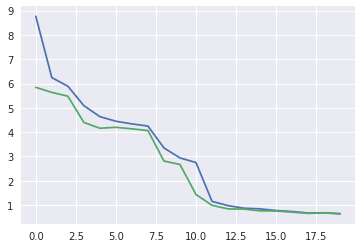

In [92]:
plt.show(plt.plot(history.history['loss']), plt.plot(history.history['val_loss']))

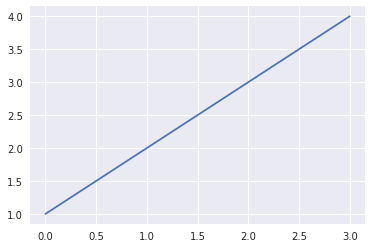

In [91]:
plt.plot([1, 2, 3, 4])

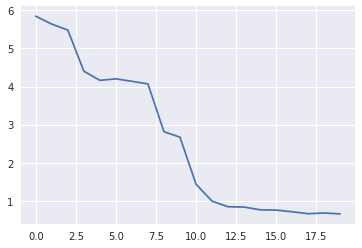

In [90]:
plt.plot(history.history['val_loss'])

## Evaluate Neural Network with Test Data

In [60]:
y_true

array([2, 3, 2, ..., 3, 4, 3])

In [61]:
y_pred = model.predict_classes(test_X)

In [62]:
y_pred

array([2, 3, 2, ..., 3, 4, 3])

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_true, y_pred)

0.9697619047619047